# 第3ステージ　高階微分を実現する

## ステップ26　計算グラフの可視化（2）

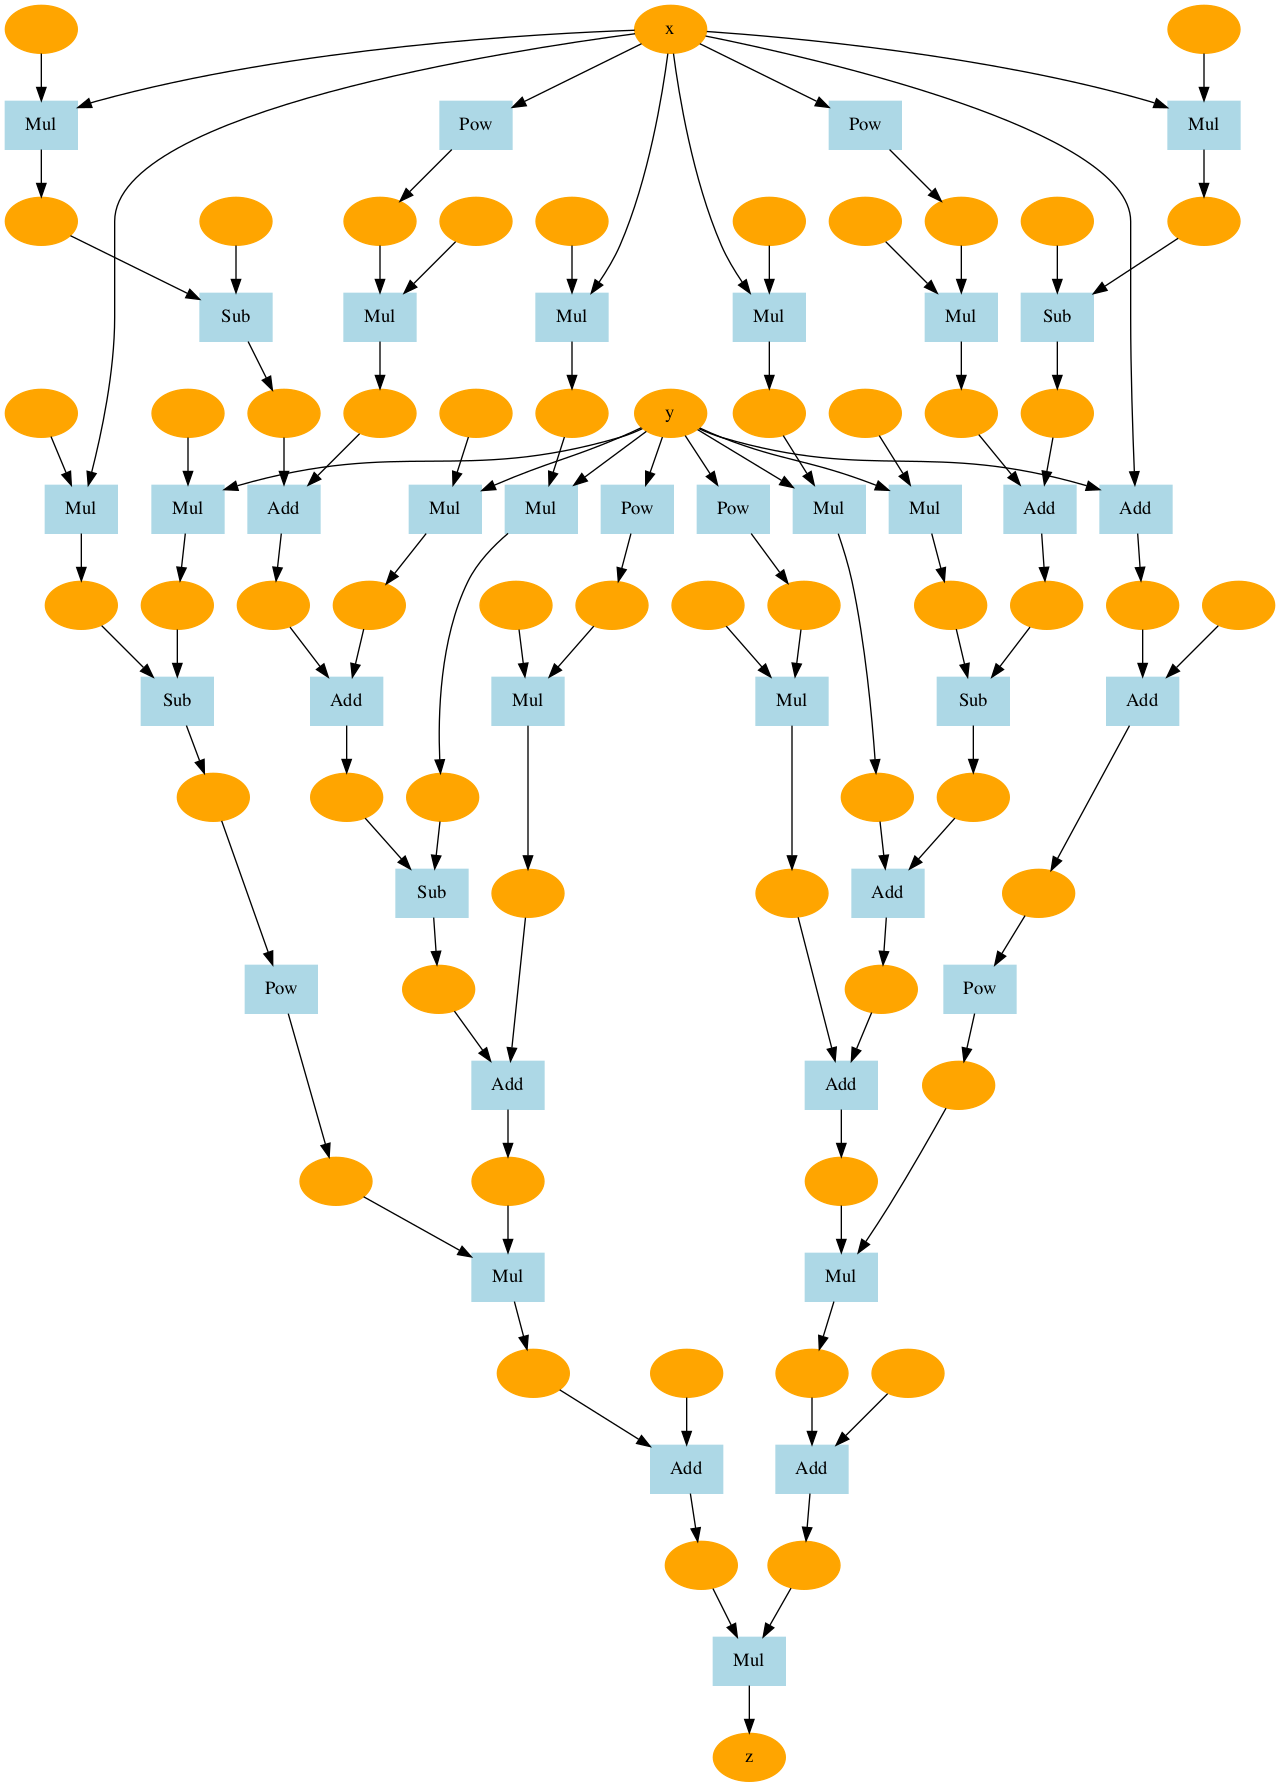

In [2]:
'''
Need the dot binary from the graphviz package (www.graphviz.org).
'''
#if '__file__' in globals():
import os, sys
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph


def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z


x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

## ステップ27　テイラー展開の微分

--- original sin(解析解) ---
0.7071067811865475
variable(0.7071067811865476)
--- approximate sin(テイラー展開) ---
0.7071064695751781
variable(0.7071032148228457)


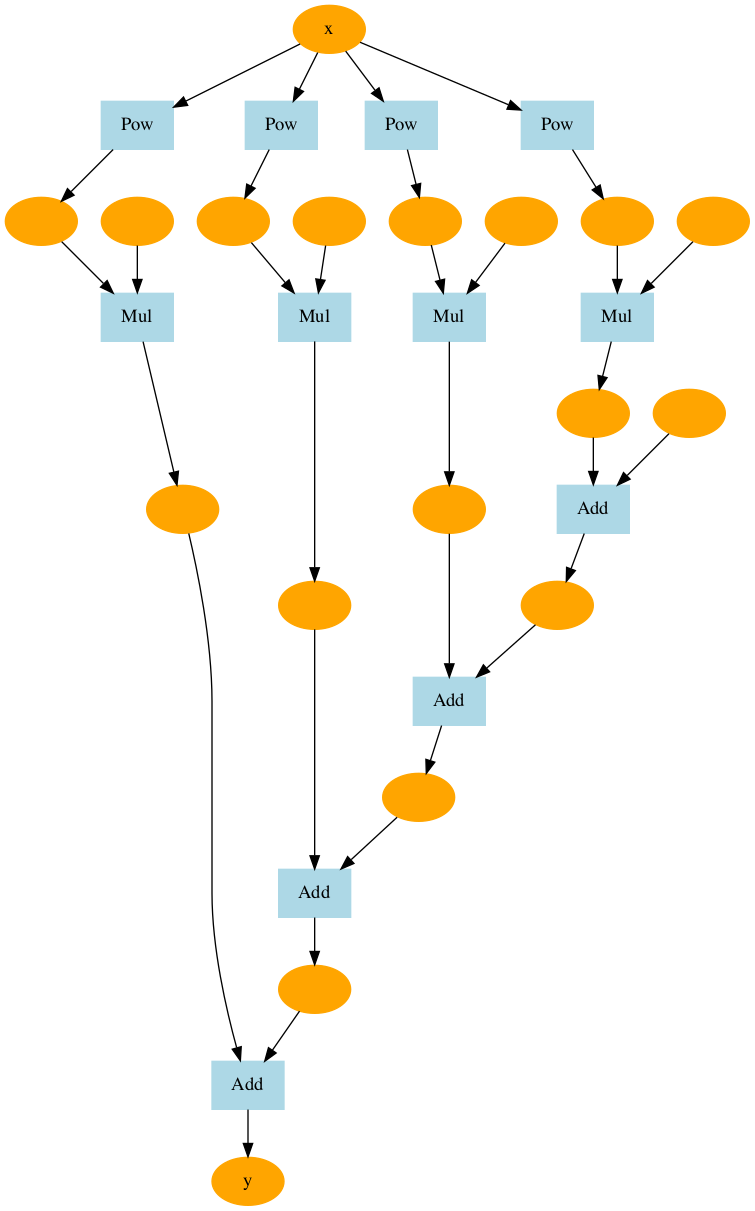

In [6]:
#if '__file__' in globals():
import os, sys
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))
import numpy as np
import math
from dezero import Variable, Function
from dezero.utils import plot_dot_graph


class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx


def sin(x):
    return Sin()(x)


x = Variable(np.array(np.pi / 4))
y = sin(x)
y.backward()
print('--- original sin(解析解) ---')
print(y.data)
print(x.grad)


def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


x = Variable(np.array(np.pi / 4))
# y = my_sin(x, threshold=1e-150)
y = my_sin(x) 
y.backward()
print('--- approximate sin(テイラー展開) ---')
print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='my_sin.png')

## ステップ28　関数の最適化

In [9]:
# 関数の最適化とは、ある関数が与えられたときに、
# その最小値（もしくは最大値）を取る（関数引数）を見つけること
# 勾配降下法はローゼンブロック関数のような谷間が長く伸びた関数は苦手

#if '__file__' in globals():
import os, sys
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))
import numpy as np
from dezero import Variable
# import dezero's simple_core explicitly
import dezero
if not dezero.is_simple_core:
    from dezero.core_simple import Variable
    from dezero.core_simple import setup_variable
    setup_variable()


# ローゼンブロック関数(バナナ関数)
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


# (-2.0, 400.0)ベクトルの形にしたものを勾配（gradient）や勾配ベクトルと呼ぶ
# 勾配は各地点において関数の出力を最も増やす方向を示す
# (0.0,2.0)地点においてyの値を最も増やす方向が(-2.0,400.0)
# 勾配にマイナスを掛けた(2.0, -400.0)の方向が、yの値を最も減らす方向であることを意味する
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)


# 勾配降下法
# 複雑な形状の関数であれば多くの場合、勾配が指し示す方向に最大値があるとは限らない
# しかし局所的な点に限定すれば、勾配は関数の出力を最も大きくする方向を示す。
# そこで勾配の方向にある距離だけ進み、その進んだ場所で再度勾配を求める作業を繰り返せば、
# 徐々に目的の場所（最大値や最小値）に近づくことが期待できる
lr = 0.001  # learning rate : 学習率
iters = 1000

x0.cleargrad()
x1.cleargrad()
    
for i in range(iters):
    print(x0, x1)

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

-2.0 400.0
variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962

variable(0.6073427253959727) variable(0.36693471106381575)
variable(0.6076590559593541) variable(0.3673208060693342)
variable(0.6079749356380509) variable(0.36770655051335005)
variable(0.6082903655320023) variable(0.3680919448834985)
variable(0.6086053467372079) variable(0.3684769896666102)
variable(0.6089198803457463) variable(0.36886168534871155)
variable(0.6092339674457934) variable(0.36924603241502485)
variable(0.6095476091216407) variable(0.3696300313499683)
variable(0.6098608064537137) variable(0.37001368263715634)
variable(0.6101735605185893) variable(0.37039698675939986)
variable(0.6104858723890146) variable(0.3707799441987064)
variable(0.6107977431339242) variable(0.3711625554362804)
variable(0.6111091738184581) variable(0.3715448209525234)
variable(0.6114201655039793) variable(0.3719267412270344)
variable(0.6117307192480914) variable(0.3723083167386102)
variable(0.6120408361046562) variable(0.3726895479652456)
variable(0.6123505171238107) variable(0.3730704353841338)
variable